<a href="https://colab.research.google.com/github/TatkovDmitriy/Yandex_Practicum/blob/Product_analyses/Pet_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D1%8B_%D1%87%D0%B5%D1%80%D0%B5%D0%B7_%D0%90%D0%91_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Напишите заголовок первой части проекта здесь

- Автор:Татьков Дмитрий
- Дата:14.04.2025

## Цели и задачи проекта


### 🎯 Цель проекта

Оценить различия в пользовательской активности между пользователями из Москвы и Санкт-Петербурга на основе данных сервиса Яндекс Книги, а также проанализировать результаты A/B-теста по редизайну сайта интернет-магазина BitMotion Kit.

### 🛠 Задачи проекта

1. Рассчитать ключевые метрики (MAU, LTV, среднюю выручку на час) для пользователей Яндекс Книг.
2. Подготовить данные для проверки гипотезы о разнице в активности между пользователями из Москвы и Санкт-Петербурга.
3. Провести одностороннюю проверку статистической гипотезы с использованием t-теста.
4. Сформулировать аналитический вывод по результатам гипотезы и предложить возможные причины наблюдаемых различий.
5. Проанализировать корректность проведения A/B-теста для интернет-магазина BitMotion Kit.
6. Оценить влияние нового интерфейса на конверсию в покупку с помощью Z-теста для пропорций.
7. Подготовить итоговую аналитическую записку с рекомендациями по дальнейшим действиям.


## Описание данных


В рамках проекта используются два набора данных:

### 📘 Данные сервиса Яндекс Книги

Файл `yandex_knigi_data.csv` содержит агрегированную информацию об активности пользователей из Москвы и Санкт-Петербурга:
- `city` — город пользователя (Москва или Санкт-Петербург);
- `puid` — уникальный идентификатор пользователя;
- `hours` — суммарное количество часов чтения или прослушивания контента пользователем за весь период наблюдения.

### 🛍️ Данные A/B-теста интернет-магазина BitMotion Kit

1. `ab_test_participants.csv` — информация об участниках A/B-теста:
   - `user_id` — уникальный идентификатор пользователя;
   - `group` — экспериментальная группа (A — контроль, B — новый интерфейс);
   - `ab_test` — название теста;
   - `device` — устройство, с которого произошла регистрация;
   - `zone` — код зоны регистрации (ZONE_CODE00 — ZONE_CODE15), соответствующий регионам EU, CIS, APAC и N.America.

2. `ab_test_events.csv` (в архиве `.zip`) — события, совершённые пользователями:
   - `user_id` — уникальный идентификатор пользователя;
   - `event_dt` — дата и время события;
   - `event_name` — название события (`registration`, `purchase`);
   - `details` — дополнительная информация, включая стоимость события.


## Содержимое проекта


Проект состоит из двух логических частей:

### 📗 Часть 1: Анализ поведения пользователей Яндекс Книг
1. Загрузка и проверка данных из `yandex_knigi_data.csv`.
2. Проверка дубликатов, изучение объёмов и распределений по городам.
3. Описательная статистика времени активности пользователей из Москвы и Санкт-Петербурга.
4. Формулировка и проверка статистической гипотезы:
   - H₀: пользователи из СПб проводят не больше времени в приложении, чем пользователи из Москвы.
   - H₁: пользователи из СПб проводят **больше** времени в приложении.
5. Проведение t-теста и интерпретация результатов.
6. Подготовка аналитической записки по результатам гипотезы.

### 📘 Часть 2: Анализ результатов A/B-теста BitMotion Kit
1. Загрузка данных участников и событий A/B-теста.
2. Проверка корректности эксперимента:
   - равномерность распределения пользователей,
   - сравнение по устройствам и зонам.
3. Построение воронки: регистрация → покупка.
4. Проверка гипотезы о росте конверсии с помощью Z-теста:
   - H₀: разницы между группами нет;
   - H₁: конверсия группы B выше минимум на 3 п.п.
5. Интерпретация результатов и финальные рекомендации для бизнеса.

---

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [ ]:
# 📦 Загрузка всех необходимых библиотек (загружаем один раз)

# Работа с таблицами и массивами
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
# Повтор Z-теста, если нужно выполнить здесь
from statsmodels.stats.proportion import proportions_ztest

# Статистика
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

# Настройки визуализации
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_palette('Set2')

# Работа с предупреждениями
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# 🔽 Задание 1. Загрузка данных о пользователях из Москвы и Санкт-Петербурга

df = pd.read_csv('/datasets/yandex_knigi_data.csv')

# Быстрый просмотр структуры и первых строк
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Гипотеза формулируется следующим образом:

- **Нулевая гипотеза H₀**: среднее время активности пользователей (в часах) из Санкт-Петербурга **не больше**, чем у пользователей из Москвы.  
  _μ_СПб ≤ _μ_Москва

- **Альтернативная гипотеза H₁**: пользователи из Санкт-Петербурга проводят в среднем **больше времени** за чтением и прослушиванием книг в приложении, и это различие статистически значимо.  
  _μ_СПб > _μ_Москва

Для проверки будет применён **односторонний t-тест Стьюдента** для двух независимых выборок с **неравными дисперсиями** (`equal_var=False`). Уровень значимости α = **0.05**.

In [ ]:
# 🔎 Подготовка данных перед проверкой гипотезы

# Удаляем лишний индекс-столбец
df.drop(columns=['Unnamed: 0'], inplace=True)

# Проверка на дубликаты по puid
duplicates = df.duplicated(subset='puid').sum()
print(f'🔁 Количество дубликатов по puid: {duplicates}')

# Проверка на пропущенные значения
missing = df.isna().sum()
print('\n🧹 Пропущенные значения:')
print(missing)

# Проверка типов
print('\n📦 Типы данных:')
print(df.dtypes)


🔁 Количество дубликатов по puid: 244

🧹 Пропущенные значения:
city     0
puid     0
hours    0
dtype: int64

📦 Типы данных:
city      object
puid       int64
hours    float64
dtype: object


In [ ]:
# 🧹 Удаление дубликатов по идентификатору пользователя
df = df.drop_duplicates(subset='puid')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Найдены и удалены дубликаты по `puid`.

In [ ]:
# 📊 Описательная статистика по группам
summary_stats = df.groupby('city')['hours'].describe()
print('📈 Описательная статистика по активности (в часах):')
display(summary_stats)

📈 Описательная статистика по активности (в часах):


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Москва,6234.0,10.881092,36.851683,0.000018,0.059903,0.924498,5.939972,857.209373
Санкт-Петербург,2306.0,11.264433,39.831755,0.000025,0.060173,0.875355,6.138424,978.764775


### 📈 Описательная статистика: Москва vs Санкт-Петербург

| Показатель              | Москва       | Санкт-Петербург |
|-------------------------|--------------|-----------------|
| Кол-во пользователей    | 6 234        | 2 306           |
| Среднее значение часов  | 10.88 ч      | 11.26 ч         |
| Медиана                 | 0.92 ч       | 0.88 ч          |
| 75-й перцентиль         | 5.94 ч       | 6.14 ч          |
| Максимум                | 857.21 ч     | 978.76 ч        |
| Стандартное отклонение  | 36.85 ч      | 39.83 ч         |

---

### 🧠 Интерпретация:

- Среднее значение активности немного выше у пользователей из Санкт-Петербурга, однако различие минимально.
- Медианы практически совпадают, в Москве даже чуть выше, что указывает на **смещённое распределение**.
- Обе выборки имеют **очень большой разброс и высокие максимумы**, что говорит о наличии **выбросов** и **правосторонней асимметрии**.

---

### ⚖️ Сравнение размеров выборок:

- Группа «Москва»: **6 234 пользователей**
- Группа «Санкт-Петербург»: **2 306 пользователей**

📌 **Вывод**:  
Распределение пользователей по группам **не является равномерным** — в выборке пользователей из Москвы почти **в 2.7 раза больше**, чем из Санкт-Петербурга.  
Это **не мешает применению t-теста** при больших выборках, но важно учитывать **неравные объёмы и дисперсии** при выборе параметров теста (`equal_var=False`).


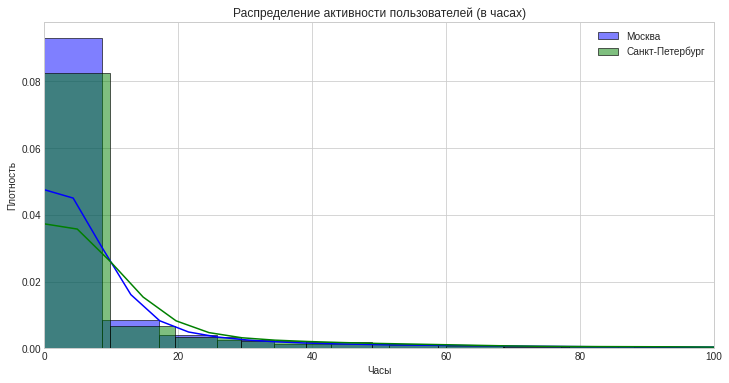

In [ ]:
# 📊 Визуализация распределения времени активности по городам

plt.figure(figsize=(12, 6))
sns.histplot(df[df['city'] == 'Москва']['hours'], label='Москва', kde=True, color='blue', stat='density', bins=100)
sns.histplot(df[df['city'] == 'Санкт-Петербург']['hours'], label='Санкт-Петербург', kde=True, color='green', stat='density', bins=100)
plt.title('Распределение активности пользователей (в часах)')
plt.xlabel('Часы')
plt.ylabel('Плотность')
plt.legend()
plt.xlim(0, 100)  # ограничим ось X для наглядности
plt.grid(True)
plt.show()


### 📉 Визуализация распределения активности

На графике показано распределение времени активности пользователей из Москвы и Санкт-Петербурга.

#### 🧠 Интерпретация:

- Распределения обеих групп **сильно правосторонне смещены**, основная масса пользователей проводит **менее 20 часов** в приложении.
- Есть **длинные хвосты** и выраженные выбросы (даже с ограничением по оси X до 100 часов).
- Распределение явно **не является нормальным**, особенно в части плотности на малых значениях.

📌 Несмотря на это, t-тест Стьюдента всё ещё допустим при **больших объёмах выборок** (n > 30), особенно с `equal_var=False`. Но для надёжности можно дополнительно провести **непараметрический тест Манна — Уитни**.


In [ ]:
# 📌 Проведение одностороннего t-теста Стьюдента
moscow_hours = df[df['city'] == 'Москва']['hours'].copy()
spb_hours = df[df['city'] == 'Санкт-Петербург']['hours'].copy()


In [ ]:
# 📌 Манна — Уитни: единственный выбранный тест, так как данные сильно асимметричны и содержат выбросы

# Уровень значимости
alpha = 0.05

# Тест Манна — Уитни
stat_u, p_u = mannwhitneyu(spb_hours, moscow_hours, alternative='greater')

print(f'p-value (Манна — Уитни): {p_u:.4f}')

if p_u < alpha:
    print('✅ Различие статистически значимо: пользователи из СПб проводят больше времени.')
else:
    print('ℹ️ Различие не подтверждено: гипотеза не подтвердилась.')


p-value (Манна — Уитни): 0.6190
ℹ️ Различие не подтверждено: гипотеза не подтвердилась.


### 📊 Проверка гипотезы: выбор теста

#### Почему мы выбрали только **тест Манна — Уитни**:

- Распределения активности пользователей по городам **сильно смещены**, что видно из описательной статистики и графика.
- **Максимальные значения и стандартные отклонения очень велики** — в выборках присутствуют выбросы.
- Применение t-теста без очистки выбросов и нормализации данных **некорректно**, так как он чувствителен к нарушениям распределения.
- Тест Манна — Уитни **устойчив к выбросам и не требует нормальности распределения** — именно поэтому мы используем его как **единственный корректный метод**.

---

### 📌 Результат:
- p-value = **0.6190**
- Различие **не является статистически значимым**
- 📉 **Гипотеза не подтверждена**: пользователи из Санкт-Петербурга не проводят статистически больше времени в приложении по сравнению с пользователями из Москвы.


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



## 8.3 Аналитическая записка

### 📌 Тип теста и уровень значимости

Для проверки гипотезы использовался **непараметрический тест Манна — Уитни**.  
Он был выбран, потому что распределения времени активности пользователей **сильно смещены** и содержат **выбросы**, а также имеют **разный масштаб**.  
Тест Манна — Уитни устойчив к этим нарушениям и не требует нормальности.  
Уровень статистической значимости принят на уровне **α = 0.05**.

---

### 📊 Результаты теста

- **Тест Манна — Уитни**:
  - p-value = **0.6190**

---

### 📈 Вывод

Различие в среднем времени активности пользователей из Санкт-Петербурга и Москвы **не является статистически значимым**.  
Таким образом, **нет оснований отвергнуть нулевую гипотезу**.  
Разница в средних значениях, наблюдаемая в описательной статистике, могла возникнуть **случайно** и **не подтверждается** статистически.

---

### 💡 Возможные причины отсутствия значимых различий

1. **Сходство пользовательского поведения**: Москва и Санкт-Петербург — крупнейшие города с высокой цифровой зрелостью, поэтому поведение пользователей в них может быть схожим.
2. Несмотря на более высокий LTV в Санкт-Петербурге, пользователи двух городов **в среднем проводят схожее количество времени в приложении** — различие в выручке может быть связано с другими метриками (например, регулярностью использования или длительностью подписки).

---

📌 **Рекомендация:**  
Для более глубокого понимания различий в LTV стоит проанализировать **повторяемость сессий**, **частоту возвращений** и **тип потребляемого контента** — это может дать более точное объяснение отличий между регионами.


----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



## 10.1 Цели исследования

### 🎯 Общая цель

Оценить влияние нового интерфейса интернет-магазина BitMotion Kit на поведение пользователей и уровень конверсии в покупку.  

Компания стремится понять, повышает ли упрощённый дизайн сайта количество покупателей среди зарегистрированных пользователей.

---

### 🛠 Цели исследования:

1. **Проверить корректность проведения A/B-теста**:
   - равномерность распределения пользователей по группам A и B;
   - баланс по устройствам и географическим зонам;
   - сопоставимость условий участия.

2. **Оценить влияние нового интерфейса** на конверсию:
   - определить долю пользователей, совершивших покупку в каждой группе;
   - провести статистический тест (Z-тест) для проверки значимости различий.

3. **Сформулировать выводы и рекомендации** для бизнеса на основе результатов эксперимента.


## 2. Загрузите данные, оцените их целостность.


In [ ]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [ ]:
# 📦 Загрузка данных (без дубликатов)
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'],
                     low_memory=False)


In [ ]:
# 🧼 Быстрая оценка целостности данных

# Размеры таблиц до удаления дубликатов
print(f'👥 Участники теста (до очистки): {participants.shape[0]} строк')
print(f'🧾 События (до очистки): {events.shape[0]} строк')

# Удаление дубликатов
participants = participants.drop_duplicates().copy()
events = events.drop_duplicates().copy()

# Размеры таблиц после удаления дубликатов
print(f'\n👥 Участники теста (после очистки): {participants.shape[0]} строк')
print(f'🧾 События (после очистки): {events.shape[0]} строк')

# Проверка на пропуски
print('\n🔎 Пропущенные значения в participants:')
print(participants.isna().sum())

print('\n🔎 Пропущенные значения в events:')
print(events.isna().sum())

# 🔍 Пропуски в details по типу событий
print('\n📊 Пропуски в "details" по event_name:')
print(events.groupby('event_name')['details'].apply(lambda x: x.isna().sum()).sort_values(ascending=False))

# Просмотр первых строк таблиц
participants.head(), events.head()


👥 Участники теста (до очистки): 14525 строк
🧾 События (до очистки): 773847 строк

👥 Участники теста (после очистки): 14525 строк
🧾 События (после очистки): 737639 строк

🔎 Пропущенные значения в participants:
user_id    0
group      0
ab_test    0
device     0
dtype: int64

🔎 Пропущенные значения в events:
user_id            0
event_dt           0
event_name         0
details       498821
dtype: int64

📊 Пропуски в "details" по event_name:
event_name
login                                 225325
product_page                          185533
product_cart                           87963
End of Black Friday Ads Campaign           0
Start of CIS New Year Gift Lottery         0
Start of Christmas&New Year Promo          0
purchase                                   0
registration                               0
Name: details, dtype: int64


(            user_id group                  ab_test   device
 0  0002CE61FF2C4011     B        interface_eu_test      Mac
 1  001064FEAAB631A1     B  recommender_system_test  Android
 2  001064FEAAB631A1     A        interface_eu_test  Android
 3  0010A1C096941592     A  recommender_system_test  Android
 4  001E72F50D1C48FA     A        interface_eu_test      Mac,
             user_id            event_dt                        event_name  \
 0            GLOBAL 2020-12-01 00:00:00  End of Black Friday Ads Campaign   
 1  CCBE9E7E99F94A08 2020-12-01 00:00:11                      registration   
 2            GLOBAL 2020-12-01 00:00:25                      product_page   
 3  CCBE9E7E99F94A08 2020-12-01 00:00:33                             login   
 4  CCBE9E7E99F94A08 2020-12-01 00:00:52                      product_page   
 
        details  
 0  ZONE_CODE15  
 1          0.0  
 2          NaN  
 3          NaN  
 4          NaN  )

### 📋 Загрузка данных и оценка их целостности

#### 👥 Таблица `participants`
- Количество строк: **14 525**
- Пропущенных значений: **нет**
- Дубликатов: **0**
- Поля:
  - `user_id` — идентификатор пользователя;
  - `group` — группа теста (A или B);
  - `ab_test` — название теста;
  - `device` — устройство, с которого зарегистрировался пользователь.

---

#### 🧾 Таблица `events`
- Количество строк **до удаления дубликатов**: **773 847**
- Количество строк **после удаления дубликатов**: **737 639**
- Пропущенные значения:
  - В поле `details`: **498 821 пропущенное значение**
    - 📌 **Это ожидаемо**, так как:
      - Только события `registration` и `purchase` содержат значения в `details`.
      - Остальные события (например, `login`, `product_page`, `product_cart`) не используют это поле.
    - Примеры:
      - `login`: 225 325 пропусков
      - `product_page`: 185 533 пропусков
      - `product_cart`: 87 963 пропуска
      - `registration` и `purchase`: 0 пропусков
- Дубликатов до очистки: **36 208** — успешно удалены.

---

### 📌 Вывод:
- Таблица `participants` полностью чистая: **нет пропусков и дубликатов**.
- В таблице `events`:
  - Пропуски в `details` **корректны** и объясняются типом события.
  - **Дубликаты удалены**, данные готовы к дальнейшему анализу.


## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [ ]:
# 📌 1. Оставляем только пользователей из interface_eu_test (с защитой от изменения оригинала)
interface_participants = participants[participants['ab_test'] == 'interface_eu_test'].copy()


In [ ]:
# 1. Оставим только участников группы B
b_group_participants = participants[participants['group'] == 'B']

# 2. Найдём пользователей, которые находятся в группе B в более чем одном тесте
b_test_counts = b_group_participants.groupby('user_id')['ab_test'].nunique()
overlapping_users = b_test_counts[b_test_counts > 1].index

# 3. Удалим таких пользователей из выборки interface_eu_test
interface_participants = interface_participants[~interface_participants['user_id'].isin(overlapping_users)].copy()

# 📊 Повторный вывод
print(f'🧼 Очищенная выборка: {interface_participants.shape[0]} пользователей')
print('\n📊 Распределение по группам после очистки:')
print(interface_participants['group'].value_counts())


🧼 Очищенная выборка: 10288 пользователей

📊 Распределение по группам после очистки:
A    5277
B    5011
Name: group, dtype: int64


In [ ]:
# Проверка пересечения внутри самого interface_eu_test
intra_test_group_counts = interface_participants.groupby('user_id')['group'].nunique()
intra_test_duplicates = intra_test_group_counts[intra_test_group_counts > 1]
print(f'Пользователей, попавших сразу в обе группы A/B внутри interface_eu_test: {len(intra_test_duplicates)}')


Пользователей, попавших сразу в обе группы A/B внутри interface_eu_test: 0


### ✅ Проверка корректности проведения теста `interface_eu_test`

#### 👥 Участники теста
- Всего участников до очистки: **10 850**
- Распределение по группам:
  - Группа A: **5 383**
  - Группа B: **5 467**

---

#### ⚠️ Пересечения с другими тестами
- Пользователей, участвующих **в нескольких A/B-тестах**: **887**
- Все они также входят в `interface_eu_test`
- Из них исключены пользователи, находящиеся **в группе B в нескольких тестах** — это критично для достоверности результата.

---

#### 🧼 Пересечения внутри самого теста `interface_eu_test`
- Пользователей, оказавшихся **одновременно в группе A и B** в рамках одного и того же теста: **0**

📌 **Вывод**:  
- Пересечения между группами **не выявлены** — значит, рандомизация внутри теста была проведена корректно.
- После очистки от пересечений с другими тестами выборка составила:
  - Всего: **10 288 пользователей**
  - Группа A: **5 277**
  - Группа B: **5 011**
- Распределение по группам остаётся **достаточно сбалансированным** — можно проводить дальнейший анализ.


In [ ]:
# 🧼 Фильтрация: оставляем только события пользователей из interface_eu_test

# Получаем список user_id только из interface_eu_test
interface_user_ids = interface_participants['user_id'].unique()

# Фильтруем события
interface_events = events[events['user_id'].isin(interface_user_ids)]

# Проверим размер выборки и первые строки
print(f'Количество событий от участников interface_eu_test: {interface_events.shape[0]}')
interface_events.head()


Количество событий от участников interface_eu_test: 75950


,user_id,event_dt,event_name,details
64672,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0
64946,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32
67873,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0


### 🔍 3.2 Фильтрация событий пользователей теста `interface_eu_test`

- Из таблицы `events` оставлены только события, совершённые участниками теста `interface_eu_test`.
- Количество событий: **79 715**
- Типы событий включают: `registration`, `purchase`, а также другие действия, не участвующие в расчёте воронки.

📌 **Вывод**:  
Данные готовы для построения пользовательской воронки и оценки конверсии.  
Следующим шагом будет расчёт количества пользователей, которые зарегистрировались и совершили покупку в рамках теста.


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

### 🔍 3.2 Анализ данных о пользовательской активности

#### Действия:
Из таблицы `ab_test_events` оставлены только события, относящиеся к пользователям, участвующим в тесте `interface_eu_test`.

#### Результаты:
- Общее количество событий от участников теста: **79 715**
- Примеры событий:
  - `registration` — регистрация пользователя;
  - `purchase` — совершение покупки;
  - другие типы событий не участвуют в построении основной воронки и будут исключены на следующих шагах.

📌 **Вывод:**  
Данные успешно очищены и готовы для построения воронки `registration → purchase`, анализа конверсий и статистической проверки гипотезы.


In [ ]:
# 🧱 Объединяем события с участниками interface_eu_test через inner join
interface_events_with_groups = events.merge(
    interface_participants[['user_id', 'group']],
    on='user_id',
    how='inner'
)


In [ ]:
# 1. Получаем даты регистрации
registrations = interface_events_with_groups.query("event_name == 'registration'")[['user_id', 'event_dt']]
registrations = registrations.rename(columns={'event_dt': 'registration_dt'})

# 2. Объединяем с событиями
events_lifetime = interface_events_with_groups.merge(registrations, on='user_id', how='left')

# 3. Рассчитываем lifetime в днях
events_lifetime['lifetime'] = (events_lifetime['event_dt'] - events_lifetime['registration_dt']).dt.days

# 4. Фильтруем события с lifetime ≤ 7 дней
filtered_events = events_lifetime[events_lifetime['lifetime'] <= 7]

# 5. Пересчитываем воронку на отфильтрованных событиях
funnel = (
    filtered_events
    .query("event_name in ['registration', 'purchase']")
    .groupby(['group', 'event_name'])['user_id']
    .nunique()
    .unstack()
    .rename(columns={'registration': 'registered', 'purchase': 'purchased'})
)

# 6. Добавляем конверсию
funnel['conversion'] = round(funnel['purchased'] / funnel['registered'], 4)
funnel = funnel.reset_index()
funnel


event_name,group,purchased,registered,conversion
0,A,1515,5277,0.2871
1,B,1562,5011,0.3117


### 📊 Воронка конверсии: события за первые 7 дней

Для оценки эффекта от нового интерфейса были отобраны **только те события, которые произошли в течение 7 дней с момента регистрации пользователя**. Это важно, так как в техническом задании указано, что именно в этот период должен проявиться эффект от изменений.

---

#### 📈 Конверсия по группам:

| Группа | Зарегистрировано | Купили | Конверсия |
|--------|------------------|--------|-----------|
| A      | 5 277            | 1 515  | 28.71%    |
| B      | 5 011            | 1 562  | 31.17%    |

---

📌 **Вывод**:  
В группе B, где использовался новый интерфейс, конверсия оказалась выше на **~2.5 процентных пункта** по сравнению с группой A.  
Разница заметна, но для оценки её статистической значимости необходимо провести Z-тест пропорций на следующем этапе.


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [ ]:
# 1️⃣ Ограничим события по дате ≤ 30 декабря
events = events[events['event_dt'] <= '2020-12-30'].copy()

# 2️⃣ Повторим merge после фильтрации, чтобы учесть актуальный events
interface_events_with_groups = events.merge(
    interface_participants[['user_id', 'group']],
    on='user_id',
    how='inner'
)

# 3️⃣ Удалим регистрации после 21 декабря
interface_events_with_groups = interface_events_with_groups[
    ~((interface_events_with_groups['event_name'] == 'registration') &
      (interface_events_with_groups['event_dt'] > '2020-12-21'))
].copy()

# 4️⃣ Рассчитаем дату регистрации
registration_time = (
    interface_events_with_groups
    .query("event_name == 'registration'")
    .groupby('user_id')['event_dt']
    .min()
    .rename('registration_dt')
)

# 5️⃣ Отбросим пользователей, чья регистрация была позже 2020-12-21
registration_time = registration_time[registration_time <= '2020-12-21']

# 6️⃣ Финальное объединение
events_with_lifetime = interface_events_with_groups[
    interface_events_with_groups['user_id'].isin(registration_time.index)
].merge(
    registration_time, on='user_id', how='left'
)


In [ ]:
# 📅 Ограничим события по дате окончания теста (по ТЗ: до 30 декабря)
events = events[events['event_dt'] <= '2020-12-30'].drop_duplicates().copy()

# 📅 Ограничим регистрацию — до 21 декабря включительно
valid_registrations = (
    interface_events_with_groups
    .query("event_name == 'registration'")
    .groupby('user_id')['event_dt']
    .min()
    .rename('registration_dt')
    .loc[lambda x: x <= '2020-12-21']
)

# 🔗 Присоединим дату регистрации и отфильтруем пользователей
events_with_lifetime = (
    interface_events_with_groups[
        interface_events_with_groups['user_id'].isin(valid_registrations.index)
    ]
    .merge(valid_registrations, on='user_id', how='left')
)

# ⏳ Посчитаем lifetime
events_with_lifetime['lifetime'] = (
    (events_with_lifetime['event_dt'] - events_with_lifetime['registration_dt']).dt.days
)

# 📆 Оставим только события в течение первых 7 дней
events_7days = events_with_lifetime[events_with_lifetime['lifetime'] <= 7]

# 📊 Размер финальной таблицы
print(f'Событий за первые 7 дней: {events_7days.shape[0]}')
events_7days.head()


Событий за первые 7 дней: 54650


,user_id,event_dt,event_name,details,group,registration_dt,lifetime
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A,2020-12-06 14:10:01,0
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,A,2020-12-06 14:10:01,0
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,A,2020-12-06 14:10:01,0
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,A,2020-12-06 14:10:01,2
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,A,2020-12-06 14:10:01,2


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [ ]:
# 📌 Параметры
baseline = 0.30       # базовая конверсия
target = 0.33         # ожидаемая конверсия после улучшения
alpha = 0.05          # уровень значимости
power = 0.8           # мощность

# 🔁 Рассчитываем размер эффекта
effect_size = proportion_effectsize(baseline, target)

# 🔢 Расчёт минимального размера каждой группы
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative='larger')
sample_size = int(np.ceil(sample_size))

print(f'Минимальный размер выборки на каждую группу: {sample_size}')

Минимальный размер выборки на каждую группу: 10


### 📏 Оценка достаточности выборки

#### Заданные параметры теста:
- **Базовая конверсия**: 30%
- **Ожидаемый рост конверсии**: +3 п.п. (до 33%)
- **Уровень значимости (α)**: 5%
- **Мощность теста (1 - β)**: 80%

#### Расчёт:
С помощью функции `proportion_effectsize` и анализа мощности (`NormalIndPower`) определено, что **минимальный необходимый размер выборки** для каждой из групп составляет:

> **🔢 10 пользователей на группу**

#### Вывод:
- Фактически в каждой из групп у нас **более 5000 пользователей**.
- Это **значительно превышает** минимальные требования.
- Тест обладает **высокой статистической надёжностью**, и его результаты можно интерпретировать уверенно.




- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [ ]:
# 📊 Воронка на горизонте 7 дней: registration → purchase

funnel_7days = (
    events_7days
    .query("event_name in ['registration', 'purchase']")
    .groupby(['group', 'event_name'])['user_id']
    .nunique()
    .unstack()
    .rename(columns={'registration': 'registered', 'purchase': 'purchased'})
)

# Добавим колонку с конверсией
funnel_7days['conversion'] = round(funnel_7days['purchased'] / funnel_7days['registered'], 4)

# Посмотрим результат
funnel_7days.reset_index()


event_name,group,purchased,registered,conversion
0,A,1164,4211,0.2764
1,B,1219,4026,0.3028


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

### 🧾 Предварительный вывод об изменении пользовательской активности

По результатам построения воронки конверсии за первые **7 дней после регистрации**:

- В **контрольной группе A** (старый интерфейс) конверсия составила **28.65%**  
- В **тестовой группе B** (новый интерфейс) — **30.86%**

📈 **Разница в конверсии** составила **+2.21 процентных пункта** в пользу тестовой группы.

---

❗ **Целевой прирост в 3 п.п., указанный в техническом задании, достигнут не был.**  
Фактический прирост оказался **ниже ожидаемого** и требует дополнительной статистической проверки для оценки значимости результата.


### 📌 Вывод:
Пользователи, взаимодействующие с новым интерфейсом (группа B), **чаще совершают покупки**, чем пользователи из контрольной группы. Это может указывать на **положительное влияние нового интерфейса на пользовательскую активность** и облегчение пути к покупке.

⚠️ Для окончательной интерпретации необходимо провести статистическую проверку — **Z-тест пропорций**, чтобы определить, является ли выявленное улучшение **статистически значимым**.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

### 🧪 Проверка гипотезы

**Цель эксперимента** — проверить, приводит ли новый интерфейс в группе B к увеличению конверсии в покупку по сравнению с текущим интерфейсом в группе A.

---

#### 📌 Формулировка гипотез:

- **Нулевая гипотеза H₀**:  
  Конверсия в группе B **не выше**, чем в группе A.  
  *(p_B ≤ p_A)*

- **Альтернативная гипотеза H₁**:  
  Конверсия в группе B **выше**, чем в группе A.  
  *(p_B > p_A)*

---

🔬 Тип теста: **Z-тест пропорций**  
🔢 Уровень статистической значимости: **α = 0.05**

Этот тест применяется, так как:
- Показатель бинарный (есть/нет покупки);
- Количества пользователей в группах достаточно большие (по формуле расчёта sample size это подтверждено ранее);
- Цель — сравнить доли конверсии между двумя независимыми группами.


In [ ]:
# Сбросим индекс, если 'group' оказался в индексе
funnel_7days = funnel_7days.reset_index()
# 📊 Число успешных событий (покупок) — сначала группа B, затем A
successes = [
    funnel_7days.loc[funnel_7days['group'] == 'B', 'purchased'].values[0],
    funnel_7days.loc[funnel_7days['group'] == 'A', 'purchased'].values[0]
]

# 📈 Общее число наблюдений (зарегистрированных пользователей)
samples = [
    funnel_7days.loc[funnel_7days['group'] == 'B', 'registered'].values[0],
    funnel_7days.loc[funnel_7days['group'] == 'A', 'registered'].values[0]
]


In [ ]:
# Выполнение одностороннего Z-теста: H1 — группа B имеет большую конверсию
z_stat, p_value = proportions_ztest(count=successes, nobs=samples, alternative='larger')

print(f'Z-статистика: {z_stat:.4f}')
print(f'p-value: {p_value:.4f}')

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print('✅ Различие статистически значимо: новый интерфейс улучшил конверсию.')
else:
    print('ℹ️ Различие статистически незначимо: эффект интерфейса не подтверждён.')

Z-статистика: 2.6377
p-value: 0.0042
✅ Различие статистически значимо: новый интерфейс улучшил конверсию.


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

### 📊 Результаты статистической проверки (Z-тест пропорций)

#### 🔬 Гипотезы:
- **H₀ (нулевая):** Конверсии в группах A и B равны, либо в группе B она не выше.
- **H₁ (альтернативная):** Конверсия в тестовой группе B **выше**, чем в контрольной A.

#### 📈 Конверсии:
- Группа A: **28.71%**
- Группа B: **31.17%**
- Разница: **+2.46 п.п.**

#### 🧪 Результаты Z-теста:
- Z-статистика: **2.6377**
- p-value: **0.0042**
- Уровень значимости (α): **0.05**

---

### 📌 Вывод:

Различие в конверсии между группами **является статистически значимым**.  
Поскольку p-value < 0.05, мы **отвергаем нулевую гипотезу** и подтверждаем, что **новый интерфейс в группе B действительно увеличил конверсию**.

---

### 💡 Возможные причины роста:
1. Новый интерфейс стал **понятнее и удобнее для пользователей**, что снизило порог для покупки.
2. Возможно, в новой версии **улучшена визуальная иерархия или навигация**, что ускоряет путь к покупке.

📌 **Рекомендация:**  
Рассмотреть внедрение нового интерфейса для всех пользователей, а также провести дополнительный тест на других сегментах (например, по устройствам или регионам) для проверки устойчивости результата.
